In [1]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

# 1.matplotlin AIP概觀

In [2]:
%matplotlib notebook  #IPython中為 %matplotlib

UsageError: unrecognized arguments: #IPython中為 %matplotlib


In [4]:
data=np.arange(10)

In [5]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

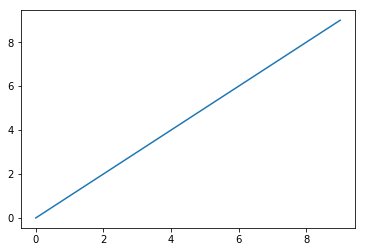

In [6]:
plt.plot(data) #一直線

***

## 圖和子圖

#### matplotlib中的圖，是儲存在一個叫做Figure的物件之中。
### 可用plt.figure建立一個新的圖:

In [7]:
fig=plt.figure()

<Figure size 432x288 with 0 Axes>

若在IPython中執行，會跳出一個空的繪圖視窗，在Jupyter中則是在做其他命令以前，什麼都不會顯示。plt.figure有數個選項可用;其中，figsize用來指定儲存圖到硬碟時，圖的尺寸有多大，還有比例為何。

#### 由於不能在空白的圖上直接畫東西，得用add_subplot建立一到多個subplots:

In [8]:
ax1=fig.add_subplot(2,2,1)

上面的命令表示圖應該被規劃成2X2(共4張子圖)，然後建立四張子圖中的第一張子圖(由1開始編號)。

In [9]:
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)

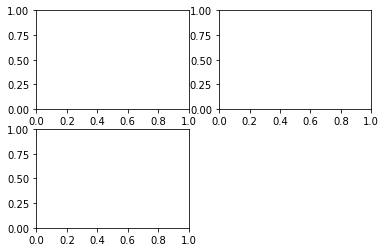

In [10]:
fig

#### 使用Jupyter notebook時要注意，每個cell在執行完之後，會重置繪圖，盡量將所有相關繪圖指令放在同個cell中執行。

#### 當執行繪圖命令後，matplotlib會在最近一個被使用的圖中，最近一個被使用的子圖上(必要時自動新建一個)作畫，可能會隱藏圖和子圖建立的過程:

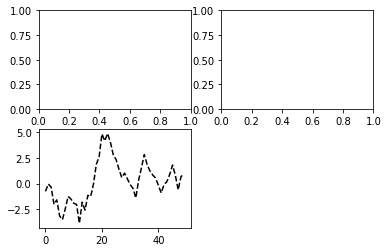

In [15]:
fig=plt.figure()
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
plt.plot(np.random.randn(50).cumsum(),'k--')

命令中的'k--'是要matplotlib畫出黑虛線的樣式選項。
#### fig.add_subplot回傳的是AxesSubplot物件，藉由呼叫AxesSubplot的實例方法，就可直接在對應的空白子圖上畫圖:

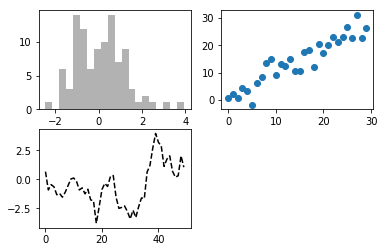

In [17]:
fig=plt.figure()
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
_=ax1.hist(np.random.randn(100),bins=20,color='k',alpha=0.3)
ax2.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))
plt.plot(np.random.randn(50).cumsum(),'k--')

***

### 由於常要建立數個子圖，matplotlib有個便利的plt.subplots方法，用來建立一個新圖，並回傳建好的子圖物件NumPy陣列:

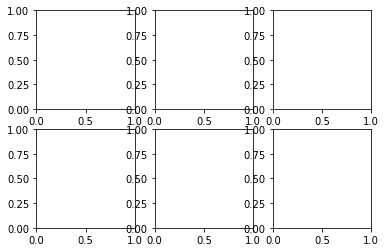

In [18]:
fig,axes=plt.subplots(2,3)

因為axes陣列可像二維陣列一樣輕鬆做索引，如axes[0,1]，也可用sharex和sharey指定子圖全部都用一樣的x或y軸。對想用同樣比例的圖進行資料比對時很有幫助；否則，matplotlib會個別把圖做自動比例設定。

![jupyter](pyplot.subplot可用選項.PNG)

***

## 調整子圖間留白

matplotlib預設會在子圖外和子圖間加上一些留白，要留多少白和圖的長寬有關，不管事用程式或用視窗裡的GUI改變圖的大小時，圖都會進行自動調整。可使用Figure物件subplots_adjust方法或是頂層subplots_adjust方法改變留白大小:

In [ ]:
 subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)

#### wspace和hspace控制子圖間留白的寬和高百分比。

### 將留白都縮到 0 :

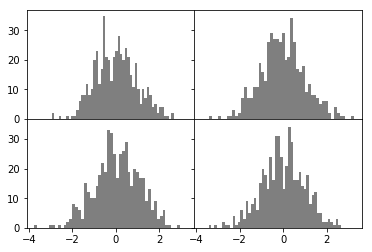

In [24]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

***

## 色彩、標示和線條樣式

matplotlib主要plot函式，可接受x和y座標陣列，還可加入一個選擇指定色彩和線條樣式縮寫的字串。
#### 想畫從x開始到y的一條綠直線:

In [ ]:
ax.plot(x,y,'g--')

#### 實務上想程式化繪圖，不使用縮寫字串，等效繪圖可明確地改寫成:

In [ ]:
ax.plot(x, y, linestyle='--', color='g')

常用的色彩都有專用的縮寫，也可用十六進位碼(例如'#CECECE')指定色彩。查看plot的docstring可看到所有可用的線條樣式。

### 畫線的時候，可為資料點加上比較醒目的標示:

由於matplotlib建立的折線圖是連續的線，在資料點和資料點中間插補，所以可能會出現看不出資料點究竟在何處的情況。

#### 加入標示-

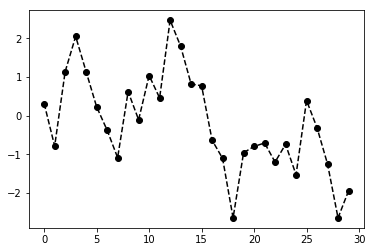

In [27]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o') #色彩-線條樣式-標示類型。

In [28]:
plt.close('all')  #清空

***

### drawstyle

對折線圖來說，預設是用線性插值來連接後面的後面的資料點，可藉由drawstyle選項變更:

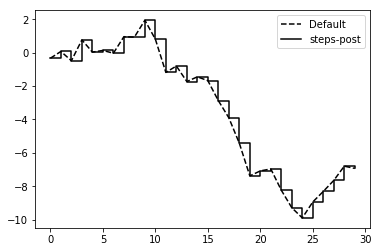

In [29]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

<matplotlib.legend.Legend at 0x2438c99c9b0> 訊息輸出，表示matplotlib將剛加入的繪圖子元件物件參照回傳。大多數情況下，可忽略此類的訊息輸出。在這範例中，由於傳入了lebel參數給plot，所以才能用plt.legend建立了可識別不同線條的圖例。

#### 不管在畫資料點時有沒有傳lebel選項，都必須要呼叫plt.legend(若是用axes參照的話，呼叫ax.legend)才能建立圖例。

***

## 刻度、標籤和圖例

 大部分的繪圖修飾，可透過兩種主要的方法達成:使用pyplot介面(即matplotlib.pyplot)和物件導向的matplotlib原生AIP。

### pyplot介面由xlim、xticks以及xticklabels方法組成。這些方法控制繪圖區域；刻度位置和刻度標籤。用法有兩種:
#### ●不帶參數呼叫，會回傳目前參數值(例如plt.xlim()會回傳目前X軸繪圖範圍)。
#### ●帶參數呼叫，會設定新的參數值(例如plt.xlim([0,10])，將X軸範例設定為0到10)。

所有方法都會作用在目前使用中，或是最後一個由AxesSubplot建立的子圖上。每個方法都對應子圖物件的兩個方法；例如xlim就代表ax.get_xlim以及ax.get_xlim。

***

## 設定主題、軸標籤、刻度和刻度標籤

### 利用axes物件客製化繪圖。
原圖:

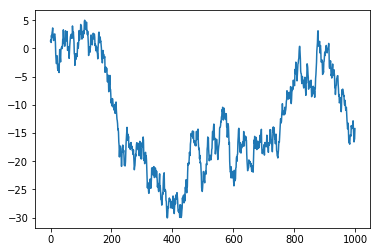

In [37]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum()) #畫上隨機漫步值

### 改變X軸的刻度，最簡單的方法是用set_xticks以及set_xticklabels。前者會告訴matplotlib在哪裡放置刻度；預設上來說，這些位置也會是刻度標籤的所在位置，不過可用set_xticklabels把刻度標籤移到別處去:

#### rotation選項讓X軸刻度標籤選轉30度，最後是使用set_xlabel指定X軸的名稱，再利用set_title設定子圖的主題。

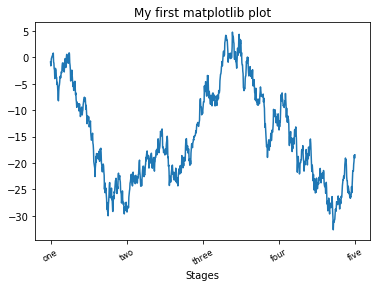

In [42]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ticks=ax.set_xticks([0,250,500,750,1000])
labels=ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')
ax.plot(np.random.randn(1000).cumsum()) #畫上隨機漫步值

修改Y軸的流程是一樣的，只要把範例中的x都換成y就可以了。

#### axes類別有一個叫set的方法，可批次設定圖的屬性。以前面的例子來說，可等效改寫成:

In [ ]:
props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
}
ax.set(**props)

***

## 加入圖例

圖例是識別繪圖元素的重要單位，加圖例的方法有好幾種。最簡單的方法是在畫每一樣東西的時候，都傳入label參數，並藉由ax.legend()或legend()自動建立圖例:

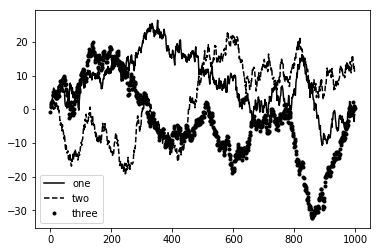

In [46]:
from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

legend方法的loc參數，有好幾種放置圖例的選擇，可查看docstring裡有完整訊息。

#### loc參數告訴matplotlib在何處放置圖例，若不想選的話，用'best'就是個好選擇，會找一個最不礙事的地方放圖例。若有不想顯示再圖例上的元素，就不要傳label或傳label='_nolegend_'。

***

## 註釋與畫圖形

除了標準的繪圖形態之外，可畫上一些自有文字、箭頭或其他形狀的註釋。

#### 可使用text、arrow和annotate函式加入註釋和文字。例如text會在指定的座標(x,y)處畫上課置樣式文字:

In [ ]:
ax.text(x, y, 'Hello world!',
        family='monospace', fontsize=10)

### 註釋可畫出文字和箭頭，以2007年開始的S&P500指數收盤價為範例:
#### 註釋出2008-2009年金融危機中的重要日子 ---

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

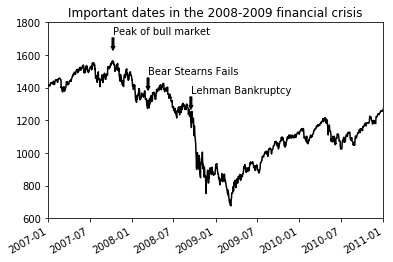

In [73]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date)+75 ),
                xytext=(date, spx.asof(date) +225 ), 
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

#### 這中圖中有幾個重點:ax.annotate可畫出自訂的xy軸標籤。範例中我們將軸標籤的開始和結束傳給set_xlim和set_ylim方法，取代原來matplotlib的預設值。最後用ax.set_title將圖的主題標示在圖上方。

In [ ]:
xy=(date, spx.asof(date)+75 ) #箭頭的位置
xytext=(date, spx.asof(date) +225 ) #字的位置
arrowprops=dict(facecolor='black', headwidth=4, width=2,headlength=4) #箭頭樣式

***

若今天是要在圖上畫圖出形狀的畫，須小心一點。matplotlib有代表各種常見形狀的物件，稱為patches。雖然其中一些像是Rectangle和Circle可在matplotlib.pyplot中找到，不過在matplotlib.patches中有所有的物件。

### 若要在圖上畫一個形狀，得先建立shp物件，然後用ax.add_patch(shp)把它加到子圖中:

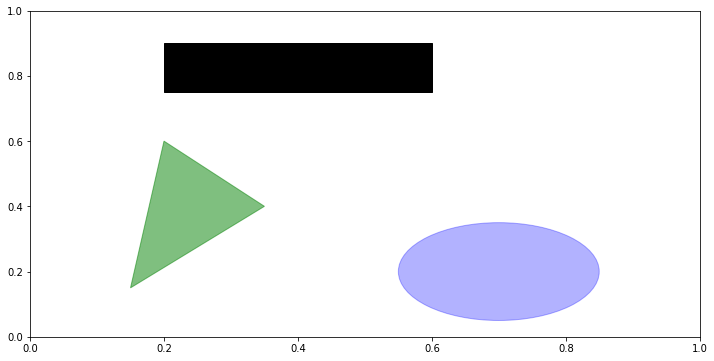

In [83]:
fig = plt.figure(figsize=(12, 6)); ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=1)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

***

## 把圖存檔

可以使用plt.savefig把當前的圖存檔，此方法等同於figure物件的savefig實例方法。
#### 舉例要把圖存成SVG:

In [ ]:
plt.savefig('figpath.svg')

文件的類型是由副檔名推測出來，若把副檔名改為.pdf的話，就會得到一個PDF。

#### savefig不只能寫到硬碟，也可寫到任何像檔案的物件中，例如BytesIO:

In [ ]:
from io import BytesIO
buffer=BytesIO()
plt.savefig(buffer)
plot_data=buffer.getvalue()

![jupyter](figure.savefig選項.PNG)

***

## matplotlib設定

matplotlib原本就有色彩方案和預設設定，但幾乎所有的預設值都可透過一組全域變數進行設定。參數包含:控制圖形大小、子圖間距、色彩、字體大小、網格樣式等等。若要從Python中以程式變更這些變數，其中一種做法為使用rc方法:
    

In [ ]:
plt.rc('figure',figsize=(10,10)) #將預設的圖形大小變為10X10

rc的第一個參數是要調整的目標元件，例如'figure'、'axes'、'xtick'及其他。後面放一串想調整的的關鍵字參數，此時用dict形態就可一次傳遞多個參數:

In [ ]:
font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size'   : 'small'}
plt.rc('font', **font_options)

***

# 2.用pandas和seaborn繪圖

使用pandas時會有多個列和欄資料，分別配有列和欄標籤。pandas有直接從DataFrame或Series物件建立視覺化的方法。另外還可以用seaborn函式庫，其簡化了許多常見的視覺化圖形的建立。

#### 由於匯入seaborn後，會改變matplotlib的預設配色以及繪圖樣式，以提升可讀性與美觀性。因此即使沒有要用seaborn的API，還是可以簡單地匯入它，提升matplotlib繪圖視覺美感。

***

## 折線圖

### Series和DataFrame都有自己的plot屬性，可繪製基本形態的圖。預設來說，直接呼叫plot()的話，就會畫出折線圖:

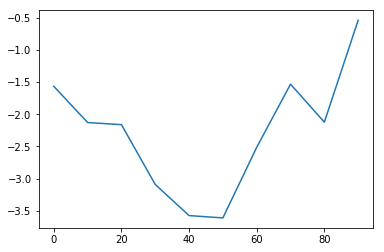

In [12]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

Series物件的index被傳遞給matplotlib後，被當作X軸刻度，可傳入user_index=False來關閉此預設行為。

#### X軸的刻度和刻度範圍可透過xticks和xlim選項改變，Y軸則是使用yticks和ylim。

![jupyter](Series.plot參數選項.PNG)

#### pandas大部分的繪圖方法都可以接受ax參數，它是matplotlib的子圖物件。此參數在繪製多個子圖時，能更有彈性的置換作用中的子圖。

***

### DataFrame的plot屬性，能在同一張子圖上把欄的值分別畫線，並自動建立圖例:

In [13]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df

,A,B,C,D
0,-0.528735,0.457002,0.929969,-1.569271
10,-1.551222,0.054175,1.150456,-1.762672
20,-0.882063,-1.594810,-1.102342,-2.929504
30,-0.528456,-0.892700,-1.376911,-3.068646
40,-0.420799,-1.499245,-1.793975,-3.085653
50,-1.644944,-3.300085,-0.159239,-2.096645
60,-1.187004,-2.744930,1.147481,-2.537198
70,-1.488355,-2.246139,0.323490,-1.216633
80,-0.980390,-2.899577,0.510469,-1.608358
90,-1.252683,-2.916718,1.190790,-0.972845


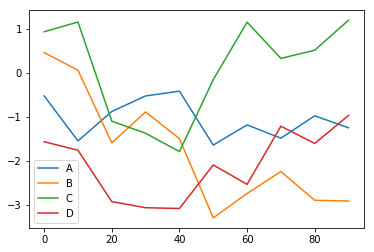

In [14]:
df.plot()

plot屬性包含繪製一系列的不同型態圖的方法，舉例來說，df.plot()和df.plot.line()是等效的。

![jupyter](DataFrame專用plot方法參數.PNG)

***

## 長條圖

#### 用plot.bar()及plot.barh()可畫出水平和垂直長條圖。 畫長條圖時，Series或DataFrame的索引會被用在表示X軸(bar)或Y軸(barh)刻度

### Series - - -

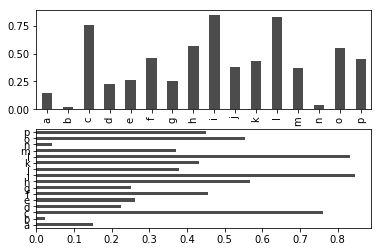

In [15]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

### DataFrame - - -
 會以一列中的多個值當成一個群組進行繪圖，每個值都緊靠再一起。

In [16]:
np.random.seed(12348)
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.370670,0.602792,0.229159,0.486744
two,0.420082,0.571653,0.049024,0.880592
three,0.814568,0.277160,0.880316,0.431326
four,0.374020,0.899420,0.460304,0.100843
five,0.433270,0.125107,0.494675,0.961825
six,0.601648,0.478576,0.205690,0.560547


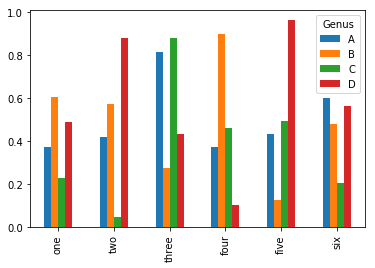

In [19]:
df.plot.bar()

  !!!     DataFrame的欄位中用的名稱"Genus"，是用來當作圖例的標題使用。     !!!

#### 如果傳入參數stacked=True，會將長條疊在一起，會看到列中的每個值疊再一起的樣子:

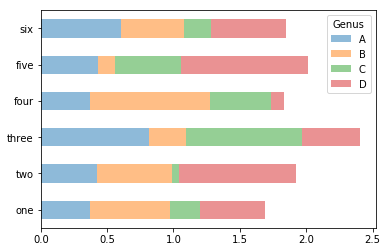

In [20]:
df.plot.barh(stacked=True, alpha=0.5)   #水平長條圖

#### 想用長條圖視覺化表達Series中值出現的頻率時，請用value_counts : Serise.value_counts().plot.bar()。

### 範例---小費資料集

以星期幾為基準，顯示每團用餐人數的百分比比例，製作一個堆疊長條圖來顯示。

In [35]:
#先讀入資料
tips=pd.read_csv('tips.csv')
#將星期幾和用餐人數做成表格
party_counts=pd.crosstab(tips['day'],tips['size'])

In [36]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [37]:
#去除1和6人用餐人數的情況
party_counts=party_counts.loc[:,2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [38]:
#正規化,使得每列加總值為1
party_counts=party_counts.div(party_counts.sum(1),axis=0)

In [39]:
party_counts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


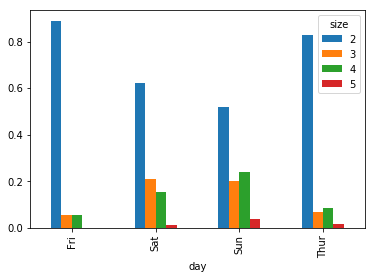

In [40]:
party_counts.plot.bar()

上圖中，逢周末時，每團用餐人書明顯較多。

In [41]:
plt.close('all')

#### 在製作一格圖表之前，如果要先把資料集做回歸或加總，使用seaborn套件可更輕鬆:
利用seaborn來顯示每天小費的百分比例。

In [43]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


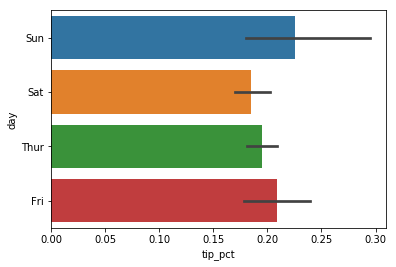

In [44]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

不同天小費的百分比例(帶有誤差顯示)。

seaborn的繪圖函式有一個data參數，可傳入一個pandas的DataFrame，其他的參數則為欄位名稱。由於星期幾(day)，會有多個觀察值，所以圖中的長條圖是tip_pct的平均值，而畫在長條線上黑色的線條，代表95%的信心程度(可透過選項參數改變)。

#### seaborn.barplot有一個hue選項，可區分其他類別的值:

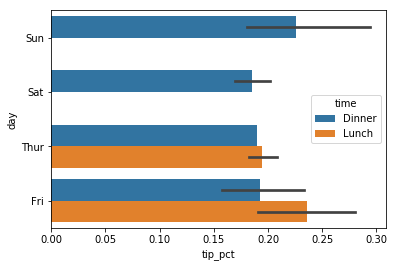

In [46]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h') #time有dinner和lunch

In [ ]:
可用seaborn.set改變繪圖的外觀:
    sns.set(style="whitegrid")

In [47]:
plt.close('all')

***

## 直方圖

直方圖(histogram)是長條圖的一種，可將值出現的頻率離散化顯示。資料點會被切成離散的、均等距離的分組，且畫出每個分組的資料點數量。

### 範例-小費資料集

小費站每張帳單的百分比用直方圖顯示。
#### 呼叫Series的plot.hist方法:

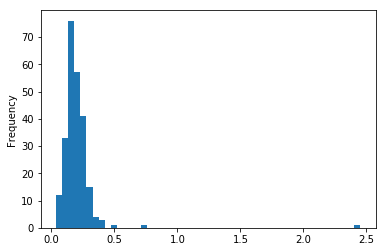

In [48]:
tips['tip_pct'].plot.hist(bins=50)

***

## 密度圖 (density plot)

由觀測資料連續機率分布的預估值組成，通常混用多個"核心"來估計分布，"核心"指的是更簡單的分布，例如常態分佈。所以，密度圖也被稱為核心密度估計(KDE)圖。

### 範例-小費資料集

#### 呼叫plot.kde時，密度圖會採用一般慣用的混合常態估計法:

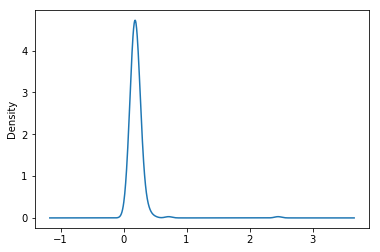

In [50]:
tips['tip_pct'].plot.kde()

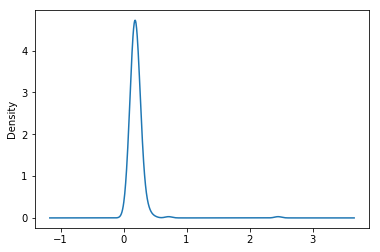

In [51]:
tips['tip_pct'].plot.density() #與上面等效

***

## 直方圖和密度圖

#### seaborn有個display方法，能使畫直方圖和密度圖變得容易，此方法可同時畫出直方圖和連續密度估計。

#### 舉例有個雙模態分布，由兩個不同的標準常態分佈組成:

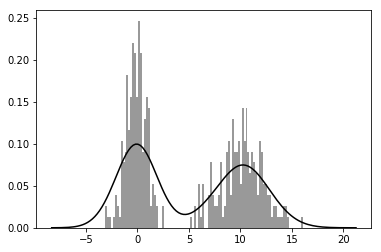

In [52]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

***

## 散佈圖或稱點圖

散佈圖又稱點圖，在觀察二維序列資料的相互關係時很好用。

### 範例---statsmodel 專案 macrodata資料集

In [53]:
#載入
macro=pd.read_csv('macrodata.csv')
#選出要的資料
data=macro[['cpi','m1','tbilrate','unemp']]

In [54]:
data

,cpi,m1,tbilrate,unemp
0,28.980,139.7,2.82,5.8
1,29.150,141.7,3.08,5.1
2,29.350,140.5,3.82,5.3
3,29.370,140.0,4.33,5.6
4,29.540,139.6,3.50,5.2
5,29.550,140.2,2.68,5.2
6,29.750,140.9,2.36,5.6
7,29.840,141.1,2.29,6.3
8,29.810,142.1,2.37,6.8
9,29.920,142.9,2.29,7.0


In [55]:
#計算資料的log差直
trans_data=np.log(data).diff().dropna()

In [57]:
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


#### 用seaborn的regplot方法，在畫散佈圖的同時，算出線性回歸線:

Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

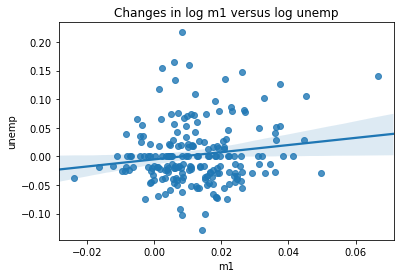

In [59]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

對於探索性資料分析來說，如果能看到一堆變數的散佈圖是很有幫助的；這一堆圖被稱為散佈圖矩陣(pairs或scatter plot matrix)。但在畫這種圖時，如果是從頭開始的話，要花一番功夫。所以seaborn有個便利的pairplot函式，可在對角線上放每個變數的直方圖或散佈圖:

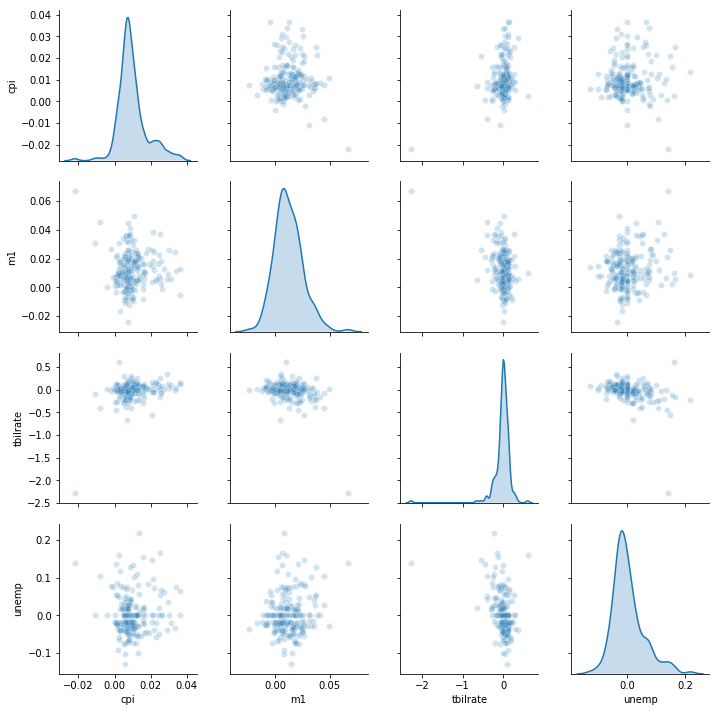

In [60]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

plot_kws參數:在話每個非對角線上的圖時，這個參數可傳遞設定項。

***

## 層面圖組與分組資料

在碰到有多個分組資料集合時，可用層面圖組(facet grid)指定多個分類變數進行視覺化。
### seaborn的factorplot函式，可簡易地畫出許多種層面圖:

D:\anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


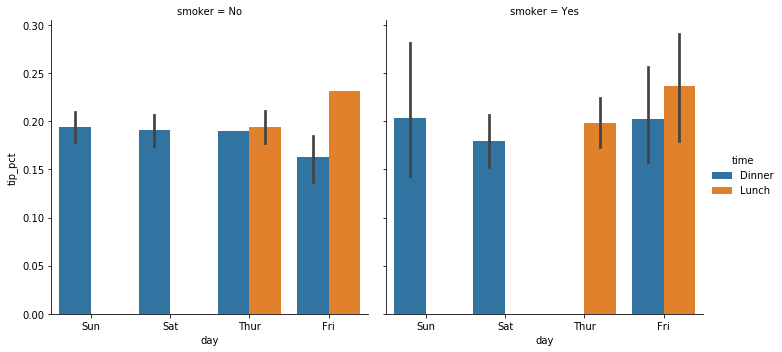

In [61]:
#小費資料集
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

上圖為以星期幾/時間/是否抽菸分組的小費百分比圖。

### 不想只用異色長條顯示'time'分組的話，可在層面圖組中將time分組擴增為新的一列圖:

D:\anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


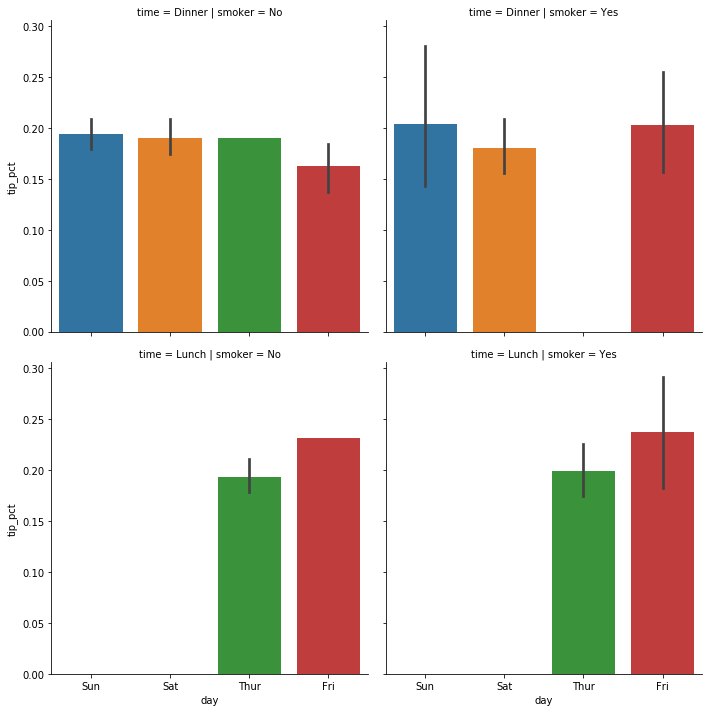

In [62]:
sns.factorplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

#### factorplot也支援其他可用的繪圖類型。舉例來說，箱型圖(圖中有中位數、四分位數和離群值)為一種很有效率的圖形:

D:\anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


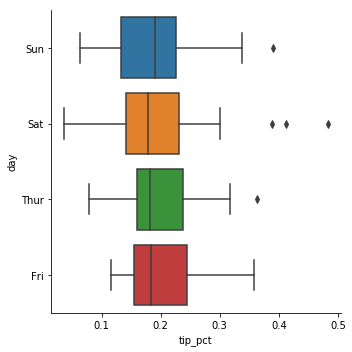

In [63]:
sns.factorplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])

依星期幾畫出tip_pct的箱型圖。

***